# HW0 - Image and Signal processing 

Thibault Schowing

Master in Bioinformatics and computational biology



## Exercice 1

0

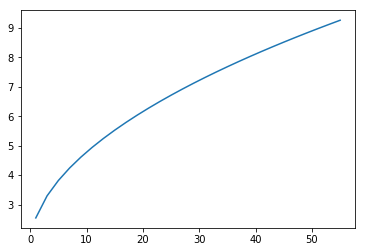

In [116]:
import numpy as np
import matplotlib.pyplot as plt


def ex_0(a,b,c):
    if(a < 0 | b < 0):
        return -1
    else:
        # a = start, b = end, c = space 
        x = np.arange(a,b+1,c)
        y = np.cos(np.exp(-x/100)) + np.sqrt(x) + 1
        plt.plot(x,y)
        return 0
        
ex_0(1,55,2)

## Exercise 2

Useful ressources:
https://scikit-image.org/
https://scipy-lectures.org/advanced/image_processing/

Forum help
https://stackoverflow.com/questions/12138339/finding-the-x-y-indexes-of-specific-r-g-b-color-values-from-images-stored-in

Numpy and images
https://www.pythoninformer.com/python-libraries/numpy/numpy-and-images/


Hello there!
Creating and displaying an  250 x  250  image.


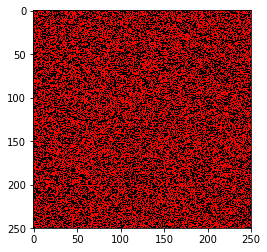

Computing distances...


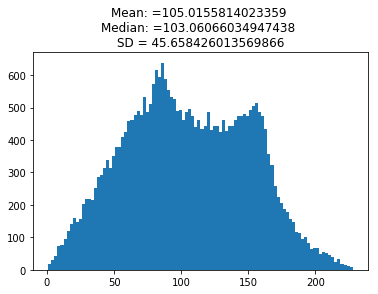

End.


In [10]:
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import random

# To verify distances
from scipy.spatial import distance


def display_img(img):
        # If image is a file or to display it: 
    
    %matplotlib inline 
    plt.imshow(img)
    plt.show()
    
    #img = Image.fromarray(t, 'RGB')
    #img.save('img.png')
    #img.show()

def create_image(n,m):
    
    # Next time - try to use "nditer" -> complex but use vectorization
    
    # Create a n x m image of black pixels
    t = np.zeros(shape=(n,m,3), dtype=np.uint8)
    
    # Randomly change the R between 0 and 255
    for i in range(n):
        for j in range(m):
            t[i,j] = [np.random.choice([0,255]),0,0]
    
    # Insert a random green pixel
    t[np.random.randint(0,n),np.random.randint(0,m)] = [0,255,0]

    return t

def find_pixels(img, pixel_values):
    # Use if image is a file
    #img = Image.open(path, mode='r')
    #img = np.array(img)
    
    
    # Get the coordinates (x and y separately) of the pixels matching the pixel_value
    coord_raw = np.where(np.all(img == pixel_values, axis = -1))
    
    # np.where returns a tuple with two vectors containing x and y coordinates 
    # Here they are put in a single matrix
    ret_coord = np.column_stack((coord_raw[0],coord_raw[1]))
    
    return(ret_coord)
    
# Take an image and compute the distances between the one green pixel and all the red ones. 
def compute_distances(img):
    
    # Get the coordinates of the green pixel and all the red ones
    green = [0,255,0]
    red = [255,0,0]
    coord_green = find_pixels(img, green)
    coord_red = find_pixels(img, red)
    
    # Calculate distances between the green pixel and all the red ones
    
    #                coord_red[...,0] = all y                    coord_red[...,1] = all x
    dists = np.sqrt((coord_red[...,0] - coord_green[0][0])**2 + (coord_red[...,1] - coord_green[0][1])**2)
    
    
    #function to confirm results from scipy.spatial - the two histograms are plot later
    conf_dists = distance.cdist(coord_green, coord_red, 'euclidean')
    
    # Return both calculated distances in a vector form (flattened in 1 dimention)
    return (dists.flatten(), conf_dists.flatten())



# Plot the given vector in a histogram with 100 bins
def display_results(dists):
    # Displaying requested values
    mean = np.mean(dists)
    median = np.median(dists)
    sd = np.std(dists)
    
    # mandatory for Jupyter notebook
    %matplotlib inline 
    titlestr = 'Mean: ='+ str(mean)+' \nMedian: ='+ str(median)+' \nSD = '+ str(sd)
    plt.title(titlestr)
    plt.hist(dists, bins = 100)
    plt.show()
    return 1


n = 250
m = 250

img = create_image(n,m)
display_img(img)
dists = compute_distances(img)
display_results(dists[0])

# Confirmation from library (not necessary)
# display_results(dists[1])

print("End.")





In [ ]:
np.sqrt(np.sum((point-points)**2)) - x et y vectors of 

# Exercise 3

Using the image stopturnsigns.jpg from ILIAS, try to find the threshold values tmin, tmax, such that a mask m contains only pixels of the stop sign. An example of such a boolean binary mask can be seen below.